### ILEO-CECAL RESECTION IN CROHN’S DISEASE 

## Background 
###### Crohn's disease is a chronic inflammatory bowel disease that affects the digestive tract. Children who have severe Crohn's disease generally undergo surgery, such as an ileo-cecal resection, to remove the diseased section of the colon in hope to relieve some of the symptoms. The treatment plan post surgery differs depending on institution standards. Some practices believe that initiating children on anti-tnf therapy, such as infliximab, to control their disease further after surgery will help prevent the disease for re-occuring in the retained healthy sections of the colon. As of now, there are no studies that prove what causes re-occurence in children with Crohn's post ileo-cecal resection and what may help prevent this. This dataset was gathered to explore possible clinical factors that may be indicators of disease recurrence post surgery. It is also meant to explore whether or not starting children on anti-tnf therapy shortly post surgery will affect whether or not patients have recurrence of disease. 

## Data Collection 

##### Different types of information such as disease phenotype, disease history, surgical history and medication history was abstracted from patients medical electronic charts. Limitations to the data include that not all patients had the required information, thus some rows were left blank (NaN).

A patient gets a colonoscopy within the 1st year post surgery. This colonoscopy will be when physicians decide whether or not the patient has disease recurrence. Recurrence vs. non-recurrence was judged based on data from this first scope. 

**Hypothesis**: Starting Anti-tnf therapy shortly post surgery can decrease recurrence of disease in patients post ileo-cecal resection. 

Null Hypothesis to reject: 
1. There is no difference in exposure time to antitnf post surgery between ER and NER patients:

      . Look at duration of antitnf from surgery to 1st scope and compare between ER and NER groups

2. There is no difference in patients who started anti-tnf <=2 months post surgery between ER and NER groups. 

Alternative Hypothesis:
We have patients with more severe disease in the ER group thus recurrence post ileo-cecal resection is not due to them being on any sort of medication but it due to them having more severe disease to begin with. 

In [0]:
!pip install lifelines

In [0]:
from lifelines import KaplanMeierFitter
from lifelines.utils import median_survival_times, qth_survival_times
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

In [0]:
# Read in data
diseasechar=pd.read_csv('class_proj_data.csv')
meds=pd.read_csv('meds2.csv')

In [0]:
diseasechar.head()

,ID,group,sex,ethnicity,rutgeert_1,time_ss1,image_recur,date_surgery1,date_imaging,date_secondsurg,second_surg,date_scope1,date_diagnosis,age_surgery,dx_dur,L1,L2,L3,L4A,L4B,dx_beh,dx_perian,dx_growthfail,srl1,srl2,srl3,srl4a,srl4b,surgbeh,surgperi,surggf,surgmani,trough_level,tnf_therap,tlmeas,elective_urgent,surg_ind,type_surg,abscess,phlegmon,...,ilealdiv,res_length,res_marg,res_inflam,res_granu,res_fibrosis,crp_sc,calpro_sc,1date_calpro_sc,hct_sc,esr_sc,alb_sc,hgb_sc,aPCDAI_sc,wPCDAI_sc,PCDAI_sc,sPCDAI_sc,crp_fu,calpro_fu,1date_calpro_fu,hct_fu,esr_fu,alb_fu,hgb_fu,aPCDAI_fu,wPCDAI_fu,PCDAI_fu,sPCDAI_fu,crp_last,calpro_last,1date_calpro_last,hct_last,esr_last,alb_last,hgb_last,aPCDAI_last,wPCDAI_last,PCDAI_last,sPCDAI_last,fu_since_surgery
0,1,ER,0,1,2,9.63,0.0,5/17/2016,1/4/2017,NaN,0,3/6/2017,5/25/2005,19.1,11.0,0,0,1,1,0,1,0,1.0,0,0,1,1,0,2,0,1.0,1,NaN,NaN,0.0,1,2,1,0,0,...,0,53.0,NaN,1,1,NaN,0.0,172.0,1/5/2017,34.0,4.0,4.0,11.7,20,45.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,32.5,30.00,NaN,NaN,39.0,11.0,4.1,12.6,15,27.5,15.0,17.5,1.99
1,2,NER,1,1,1,25.07,NaN,7/14/2015,NaN,NaN,0,8/15/2017,6/3/2011,18.3,4.1,1,0,0,1,0,2,0,1.0,1,0,0,1,0,2,0,0.0,0,9.7,1.0,1.0,1,2,1,0,0,...,0,19.0,1.0,1,0,1.0,0.2,NaN,NaN,44.0,12.0,4.2,15.0,0,NaN,NaN,0.0,0.0,NaN,NaN,44.6,5.0,4.2,15.2,0.0,0.0,0.0,0.0,0.17,NaN,NaN,43.0,6.0,4.7,15.0,0,0.0,0.0,0.0,2.86
2,3,NER,1,1,1,3.74,1.0,1/13/2015,1/5/2017,NaN,0,5/7/2015,7/30/2014,16.2,0.5,1,0,0,1,0,2,0,0.0,1,0,0,1,0,2,0,0.0,0,NaN,NaN,0.0,1,2,1,0,1,...,0,12.0,0.0,1,0,1.0,0.0,NaN,NaN,31.8,4.0,4.3,9.6,5,7.5,10.0,7.5,2.6,NaN,NaN,34.0,16.0,4.1,10.3,5.0,7.5,7.5,7.5,NaN,NaN,NaN,39.0,14.0,4.7,13.9,0,0.0,0.0,0.0,3.24
3,4,ER,0,1,2,2.17,0.0,5/19/2015,7/15/2015,12/15/2015,1,7/24/2015,2/29/2012,17.9,3.2,1,0,0,1,0,1,0,1.0,1,0,0,1,0,2,0,0.0,0,NaN,NaN,0.0,1,2,1,0,0,...,0,23.0,0.0,1,1,NaN,1.6,NaN,NaN,35.6,25.0,4.0,11.6,10,30.0,17.5,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,NaN,NaN,37.3,13.0,4.0,12.7,10,22.5,15.0,22.5,0.58
4,5,NER,1,1,1,6.80,NaN,7/30/2015,NaN,NaN,0,2/22/2016,3/10/2014,15.2,1.4,1,0,0,1,0,2,0,1.0,1,0,0,1,0,4,0,1.0,0,0.0,0.0,1.0,1,2,1,0,1,...,0,45.0,NaN,1,0,1.0,0.6,NaN,NaN,39.7,NaN,4.4,12.6,0,NaN,NaN,0.0,1.0,NaN,NaN,39.2,5.0,4.4,12.7,0.0,0.0,0.0,0.0,1.60,NaN,NaN,38.9,13.0,4.1,12.1,0,0.0,0.0,0.0,2.77


In [0]:
meds.head()

,study_id,id,med_cat,dx,surg,1yr,last_fu,post_op,scope_postup,before_surg,medstart,medend,dx_date,date_surgery,date_surgery2,scopedate,bio_less2,bio_more2,last_biologic
0,1,1,5,0,5,0,0,0,0,5,6/9/2013,8/9/2013,5/25/2005,5/17/2016,5/17/2016,3/6/2017,0.0,0.0,NaN
1,1,1,4,0,4,4,0,4,4,4,8/7/2009,5/13/2018,5/25/2005,5/17/2016,5/17/2016,3/6/2017,1.0,0.0,5/3/2018
2,1,1,3,0,0,0,3,3,0,0,5/15/2018,NaN,5/25/2005,5/17/2016,5/17/2016,3/6/2017,0.0,0.0,NaN
3,2,2,4,4,4,4,4,4,4,0,6/4/2011,NaN,6/3/2011,7/14/2015,7/14/2015,8/15/2017,1.0,0.0,NaN
4,2,2,7,0,7,0,0,0,0,7,5/8/2015,7/1/2015,6/3/2011,7/14/2015,7/14/2015,8/15/2017,0.0,0.0,NaN


In [0]:
# Convert dates so can calculate duration
diseasechar['date_surgery1']=pd.to_datetime(diseasechar['date_surgery1'])
diseasechar['date_scope1']=pd.to_datetime(diseasechar['date_scope1'])
diseasechar.head()

,ID,group,sex,ethnicity,rutgeert_1,time_ss1,image_recur,date_surgery1,date_imaging,date_secondsurg,second_surg,date_scope1,date_diagnosis,age_surgery,dx_dur,L1,L2,L3,L4A,L4B,dx_beh,dx_perian,dx_growthfail,srl1,srl2,srl3,srl4a,srl4b,surgbeh,surgperi,surggf,surgmani,trough_level,tnf_therap,tlmeas,elective_urgent,surg_ind,type_surg,abscess,phlegmon,...,ilealdiv,res_length,res_marg,res_inflam,res_granu,res_fibrosis,crp_sc,calpro_sc,1date_calpro_sc,hct_sc,esr_sc,alb_sc,hgb_sc,aPCDAI_sc,wPCDAI_sc,PCDAI_sc,sPCDAI_sc,crp_fu,calpro_fu,1date_calpro_fu,hct_fu,esr_fu,alb_fu,hgb_fu,aPCDAI_fu,wPCDAI_fu,PCDAI_fu,sPCDAI_fu,crp_last,calpro_last,1date_calpro_last,hct_last,esr_last,alb_last,hgb_last,aPCDAI_last,wPCDAI_last,PCDAI_last,sPCDAI_last,fu_since_surgery
0,1,ER,0,1,2,9.63,0.0,2016-05-17,1/4/2017,NaN,0,2017-03-06,5/25/2005,19.1,11.0,0,0,1,1,0,1,0,1.0,0,0,1,1,0,2,0,1.0,1,NaN,NaN,0.0,1,2,1,0,0,...,0,53.0,NaN,1,1,NaN,0.0,172.0,1/5/2017,34.0,4.0,4.0,11.7,20,45.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,32.5,30.00,NaN,NaN,39.0,11.0,4.1,12.6,15,27.5,15.0,17.5,1.99
1,2,NER,1,1,1,25.07,NaN,2015-07-14,NaN,NaN,0,2017-08-15,6/3/2011,18.3,4.1,1,0,0,1,0,2,0,1.0,1,0,0,1,0,2,0,0.0,0,9.7,1.0,1.0,1,2,1,0,0,...,0,19.0,1.0,1,0,1.0,0.2,NaN,NaN,44.0,12.0,4.2,15.0,0,NaN,NaN,0.0,0.0,NaN,NaN,44.6,5.0,4.2,15.2,0.0,0.0,0.0,0.0,0.17,NaN,NaN,43.0,6.0,4.7,15.0,0,0.0,0.0,0.0,2.86
2,3,NER,1,1,1,3.74,1.0,2015-01-13,1/5/2017,NaN,0,2015-05-07,7/30/2014,16.2,0.5,1,0,0,1,0,2,0,0.0,1,0,0,1,0,2,0,0.0,0,NaN,NaN,0.0,1,2,1,0,1,...,0,12.0,0.0,1,0,1.0,0.0,NaN,NaN,31.8,4.0,4.3,9.6,5,7.5,10.0,7.5,2.6,NaN,NaN,34.0,16.0,4.1,10.3,5.0,7.5,7.5,7.5,NaN,NaN,NaN,39.0,14.0,4.7,13.9,0,0.0,0.0,0.0,3.24
3,4,ER,0,1,2,2.17,0.0,2015-05-19,7/15/2015,12/15/2015,1,2015-07-24,2/29/2012,17.9,3.2,1,0,0,1,0,1,0,1.0,1,0,0,1,0,2,0,0.0,0,NaN,NaN,0.0,1,2,1,0,0,...,0,23.0,0.0,1,1,NaN,1.6,NaN,NaN,35.6,25.0,4.0,11.6,10,30.0,17.5,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,NaN,NaN,37.3,13.0,4.0,12.7,10,22.5,15.0,22.5,0.58
4,5,NER,1,1,1,6.80,NaN,2015-07-30,NaN,NaN,0,2016-02-22,3/10/2014,15.2,1.4,1,0,0,1,0,2,0,1.0,1,0,0,1,0,4,0,1.0,0,0.0,0.0,1.0,1,2,1,0,1,...,0,45.0,NaN,1,0,1.0,0.6,NaN,NaN,39.7,NaN,4.4,12.6,0,NaN,NaN,0.0,1.0,NaN,NaN,39.2,5.0,4.4,12.7,0.0,0.0,0.0,0.0,1.60,NaN,NaN,38.9,13.0,4.1,12.1,0,0.0,0.0,0.0,2.77


In [0]:
## Based on clinical feedback. It was post 2012 that clinical practice started to use Anti-tnf therapy shortly after surgery
## Given that I seperated the data into two groups, patients who got surgery prior to 12/31/2012 and patients who got surgery post 12/31/2012.
# This will help test the Hypothesis of whether or not starting Anti-tnf right after surgery helped decrease the rate of recurrence. 
surg_proir2012=diseasechar.query('date_surgery1 <= "2012-01-01"')
surg_after2012=diseasechar.query('date_surgery1>"2012-01-01"')

In [0]:
from lifelines.utils import datetimes_to_durations
## Creating Dataframe for all surgery before 2012 
prior2012=pd.DataFrame({})
prior2012['surgdate']=surg_proir2012['date_surgery1']
prior2012['group']=surg_proir2012['group']
prior2012['datescope']=surg_proir2012['date_scope1']
#T will be time from surgery to first scope date. That will be judged as duration to disease recurrence. 
T,A = datetimes_to_durations(prior2012['surgdate'], prior2012['datescope'], freq='M')
prior2012['dur']=T

EventObserved=prior2012['group']=='ER'
prior2012['eventobserved']=EventObserved

prior2012.head()

,surgdate,group,datescope,dur,eventobserved
18,2010-09-29,ER,2011-08-03,10.0,True
19,2010-10-06,NER,2011-03-07,4.0,False
22,2010-12-09,NER,2011-07-13,7.0,False
26,2011-01-11,NER,2011-06-24,5.0,False
28,2011-01-25,NER,2011-07-25,5.0,False


In [0]:
## Creating Dataframe for all surgery after 2012
post2012=pd.DataFrame({})
post2012['surgdate']=surg_after2012['date_surgery1']
post2012['group']=surg_after2012['group']
post2012['datescope']=surg_after2012['date_scope1']
#T will be time from surgery to first scope date. That will be judged as duration to disease recurrence. 
T,A = datetimes_to_durations(post2012['surgdate'], post2012['datescope'], freq='M')
post2012['dur']=T

EventObserved=post2012['group']=='ER'
post2012['eventobserved']=EventObserved

post2012.head()


,surgdate,group,datescope,dur,eventobserved
0,2016-05-17,ER,2017-03-06,9.0,True
1,2015-07-14,NER,2017-08-15,25.0,False
2,2015-01-13,NER,2015-05-07,3.0,False
3,2015-05-19,ER,2015-07-24,2.0,True
4,2015-07-30,NER,2016-02-22,6.0,False


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


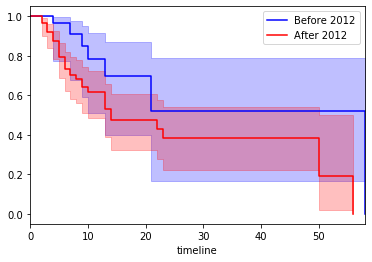

In [0]:
## Looking at the Kaplan Meier curve for the post and prior 2012 surgery dates to see if there is a difference. 
fig, ax = plt.subplots(1,1)
prior = KaplanMeierFitter()
prior.fit(prior2012['dur'], 
        event_observed=prior2012['eventobserved'])
prior.plot(c = 'b', ax=ax, label = 'Before 2012')

post = KaplanMeierFitter()
post.fit(post2012['dur'], 
        event_observed=post2012['eventobserved'])
post.plot(c = 'r', ax=ax, label = 'After 2012')


In [0]:
from lifelines.statistics import logrank_test
res2 = logrank_test(prior2012['dur'], post2012['dur'], 
                   event_observed_A=prior2012['eventobserved'], event_observed_B=post2012['eventobserved'])

print(res2.p_value)

0.034706107907218994


This shows that patients who have had surgery before 2012 has better survival in that patients have recurrence after a longer period of time in comparison to patients who had surgery after 2012. This comparison is significant (p=0.03). 

This result shows that surgery after 2012 (when physicians started to use anti-tnf more freuquently) did not show patients recurring slower. This could mean two their, either that chosig 2012 as a year arbitrarly is incorrect or that using anti-tnfs shortly post surgery really does not have an effect on recurrence. 

In [0]:
## Looking at starting biologics before 2 months and after 2 months of surgery 

tnfpostop=meds.query('post_op == "4"')
boolean = any(tnfpostop['id'].duplicated())
len(tnfpostop)
tnfpostop2=tnfpostop.drop_duplicates('id')
# Need to merge both datasets to get the needed columns 
alldata=pd.merge(tnfpostop2, diseasechar, left_on = 'id', right_on = 'ID', how='inner')
alldata.head()


,study_id,id,med_cat,dx,surg,1yr,last_fu,post_op,scope_postup,before_surg,medstart,medend,dx_date,date_surgery,date_surgery2,scopedate,bio_less2,bio_more2,last_biologic,ID,group,sex,ethnicity,rutgeert_1,time_ss1,image_recur,date_surgery1,date_imaging,date_secondsurg,second_surg,date_scope1,date_diagnosis,age_surgery,dx_dur,L1,L2,L3,L4A,L4B,dx_beh,...,ilealdiv,res_length,res_marg,res_inflam,res_granu,res_fibrosis,crp_sc,calpro_sc,1date_calpro_sc,hct_sc,esr_sc,alb_sc,hgb_sc,aPCDAI_sc,wPCDAI_sc,PCDAI_sc,sPCDAI_sc,crp_fu,calpro_fu,1date_calpro_fu,hct_fu,esr_fu,alb_fu,hgb_fu,aPCDAI_fu,wPCDAI_fu,PCDAI_fu,sPCDAI_fu,crp_last,calpro_last,1date_calpro_last,hct_last,esr_last,alb_last,hgb_last,aPCDAI_last,wPCDAI_last,PCDAI_last,sPCDAI_last,fu_since_surgery
0,1,1,4,0,4,4,0,4,4,4,8/7/2009,5/13/2018,5/25/2005,5/17/2016,5/17/2016,3/6/2017,1.0,0.0,5/3/2018,1,ER,0,1,2,9.63,0.0,2016-05-17,1/4/2017,NaN,0,2017-03-06,5/25/2005,19.1,11.0,0,0,1,1,0,1,...,0,53.0,NaN,1,1,NaN,0.0,172.0,1/5/2017,34.0,4.0,4.0,11.7,20,45.0,25.0,25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.0,NaN,NaN,32.5,30.00,NaN,NaN,39.0,11.0,4.1,12.6,15,27.5,15.0,17.5,1.99
1,2,2,4,4,4,4,4,4,4,0,6/4/2011,NaN,6/3/2011,7/14/2015,7/14/2015,8/15/2017,1.0,0.0,NaN,2,NER,1,1,1,25.07,NaN,2015-07-14,NaN,NaN,0,2017-08-15,6/3/2011,18.3,4.1,1,0,0,1,0,2,...,0,19.0,1.0,1,0,1.0,0.2,NaN,NaN,44.0,12.0,4.2,15.0,0,NaN,NaN,0.0,0.0,NaN,NaN,44.6,5.0,4.2,15.2,0.0,0.0,0.0,0.0,0.17,NaN,NaN,43.0,6.0,4.7,15.0,0,0.0,0.0,0.0,2.86
2,3,3,4,4,4,4,4,4,4,0,8/15/2014,NaN,7/30/2014,1/13/2015,1/13/2015,5/7/2015,1.0,0.0,12/26/2014,3,NER,1,1,1,3.74,1.0,2015-01-13,1/5/2017,NaN,0,2015-05-07,7/30/2014,16.2,0.5,1,0,0,1,0,2,...,0,12.0,0.0,1,0,1.0,0.0,NaN,NaN,31.8,4.0,4.3,9.6,5,7.5,10.0,7.5,2.6,NaN,NaN,34.0,16.0,4.1,10.3,5.0,7.5,7.5,7.5,NaN,NaN,NaN,39.0,14.0,4.7,13.9,0,0.0,0.0,0.0,3.24
3,4,4,4,4,4,4,4,4,4,0,4/27/2012,NaN,2/29/2012,5/19/2015,5/19/2015,7/24/2015,1.0,0.0,4/30/2015,4,ER,0,1,2,2.17,0.0,2015-05-19,7/15/2015,12/15/2015,1,2015-07-24,2/29/2012,17.9,3.2,1,0,0,1,0,1,...,0,23.0,0.0,1,1,NaN,1.6,NaN,NaN,35.6,25.0,4.0,11.6,10,30.0,17.5,22.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65,NaN,NaN,37.3,13.0,4.0,12.7,10,22.5,15.0,22.5,0.58
4,5,5,4,4,4,4,4,4,4,0,3/12/2014,NaN,3/10/2014,7/30/2015,7/30/2015,2/22/2016,1.0,0.0,7/20/2015,5,NER,1,1,1,6.80,NaN,2015-07-30,NaN,NaN,0,2016-02-22,3/10/2014,15.2,1.4,1,0,0,1,0,2,...,0,45.0,NaN,1,0,1.0,0.6,NaN,NaN,39.7,NaN,4.4,12.6,0,NaN,NaN,0.0,1.0,NaN,NaN,39.2,5.0,4.4,12.7,0.0,0.0,0.0,0.0,1.60,NaN,NaN,38.9,13.0,4.1,12.1,0,0.0,0.0,0.0,2.77


In [0]:
## Seperating patients based on columns in the data. This will show me what patients started anti-tnf shortly after surgery vs. those who did not. 
more2months=alldata.query('bio_more2 =="1.0"')
less2months=alldata.query('bio_less2 == "1.0"')

In [0]:
from lifelines.utils import datetimes_to_durations
## Creating Dataframe for all subjects who started biologics more than 2 months
## Post surgery 
bio2mo=pd.DataFrame({})
bio2mo['surgdate']=more2months['date_surgery1']
bio2mo['group']=more2months['group']
bio2mo['datescope']=more2months['date_scope1']
T,A = datetimes_to_durations(bio2mo['surgdate'], bio2mo['datescope'], freq='M')
bio2mo['dur']=T

EventObserved=bio2mo['group']=='ER'
bio2mo['eventobserved']=EventObserved

bio2mo.head()

,surgdate,group,datescope,dur,eventobserved
9,2016-08-02,ER,2017-10-18,14.0,True
17,2010-10-06,NER,2011-03-07,4.0,False
27,2015-08-25,NER,2016-01-04,4.0,False
28,2011-03-03,ER,2011-07-20,4.0,True
38,2013-05-21,ER,2013-08-26,3.0,True


In [0]:
## Creating Dataframe for all subjects who started biologics less than 2 months
## Post surgery 
bio2less=pd.DataFrame({})
bio2less['surgdate']=less2months['date_surgery1']
bio2less['group']=less2months['group']
bio2less['datescope']=less2months['date_scope1']
T,A = datetimes_to_durations(bio2less['surgdate'], bio2less['datescope'], freq='M')
bio2less['dur']=T

EventObserved=bio2less['group']=='ER'
bio2less['eventobserved']=EventObserved

bio2less.head()

,surgdate,group,datescope,dur,eventobserved
0,2016-05-17,ER,2017-03-06,9.0,True
1,2015-07-14,NER,2017-08-15,25.0,False
2,2015-01-13,NER,2015-05-07,3.0,False
3,2015-05-19,ER,2015-07-24,2.0,True
4,2015-07-30,NER,2016-02-22,6.0,False


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/core.py:652: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  return ax.plot(*args, **kwds)


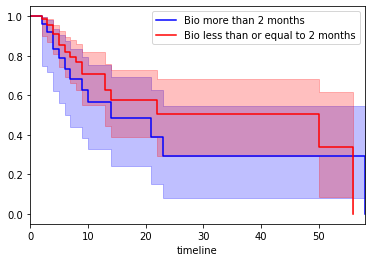

In [0]:
fig, ax = plt.subplots(1,1)
more = KaplanMeierFitter()
more.fit(bio2mo['dur'], 
        event_observed=bio2mo['eventobserved'])
more.plot(c = 'b', ax=ax, label = 'Bio more than 2 months')

less = KaplanMeierFitter()
less.fit(bio2less['dur'], 
        event_observed=bio2less['eventobserved'])
less.plot(c = 'r', ax=ax, label = 'Bio less than or equal to 2 months')

In [0]:
res1 = logrank_test(bio2less['dur'], bio2mo['dur'], 
                   event_observed_A=bio2less['eventobserved'], event_observed_B=bio2mo['eventobserved'])

print(res1.p_value)



0.38342850183780897


The Kaplan Meier curve shows that patients who have started anti-tnf with 2 months of surgery has a better survival curve in comparison to others. This translates into patients who started anti-tnf within the 2 month period recurred slower than patients who did not. However, this result is not significant (p=0.38) 

In [0]:
## Looking at Alternative Hypothosis: disease severity is higher in ER group, which is why this group recurred. 
##Use chi2 test to test the likelihood of people with more severe disease being in the ER group  
## Disease severity is measured by resection inflamation and fibrosis == 1

from scipy.stats import chi2_contingency
severdisease= diseasechar['res_inflam'] == 1
ER = diseasechar['group'] == "ER"

truth = pd.crosstab(severdisease, ER)

tstat, pvalue, dof, expected = chi2_contingency(truth)
print('p-value =', pvalue)
pd.DataFrame(expected, index = truth.index, columns = truth.columns)

truth-expected

p-value = 0.40645006906393855


group,False,True
res_inflam,,
False,1.894309,-1.894309
True,-1.894309,1.894309


Based on the p value (0.41) of testing the hypothesis that being in the ER group means you have more severe disease, there is no evidence that having more severe disease is associated with recurrence. 

In [0]:
severdisease2=diseasechar['res_fibrosis'] == 1
truth = pd.crosstab(severdisease2, ER)

tstat, pvalue, dof, expected = chi2_contingency(truth)
print('p-value =', pvalue)
pd.DataFrame(expected, index = truth.index, columns = truth.columns)

truth-expected

p-value = 0.9937568676650831


group,False,True
res_fibrosis,,
False,0.479675,-0.479675
True,-0.479675,0.479675


Based on the p value (0.99) of testing the hypothesis that being in the ER group means you have more severe disease, there is no evidence that having more severe disease is associated with recurrence. 

##Final Conclusions

The Kaplan Meier curve for anti-tnf treatment prior and post 2012 showed that the initial assumption that putting children on anti-tnf shortly after surgery starting at 2012 and after may not be correct. Selecting 2012 as a year was an assumption, thus this may not be the correct way to look at whether or not anti-tnf affect recurrence. The second Kaplan Meier curve showed that patients who started anti-tnf within 2 months post surgery have a better survival curve, however this was not significant so cannot support the hypothesis that starting anti-tnf shortly after surgery can prevent recurrence. I tested the alternate hypothesis, that people in the ER group just have more severe disease thus have recurrence, however the CHI2 test did not show significance, so this alternate hypothesis was also not supported. As of now, additional variables have to be tested to see if any have relation to recurring disease post resection. 